# Quantum Random Number Generator (QRNG)

This notebook demonstrates generating true random numbers using quantum superposition and measurement. Unlike classical pseudo-random generators, this leverages quantum uncertainty for entropy.

## Steps:
1. Create a quantum circuit with Hadamard gates for superposition.
2. Measure qubits to get random bits.
3. Generate a binary string and convert to integer if needed.
4. Visualize results.

Tech: Qiskit, Aer Simulator.

In [6]:
%matplotlib inline

In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

In [4]:
# Function to generate random bits
def generate_random_bits(num_bits):
    # Create circuit with num_bits qubits
    qc = QuantumCircuit(num_bits, num_bits)
    
    # Apply Hadamard to each qubit for superposition
    for i in range(num_bits):
        qc.h(i)
    
    # Measure each qubit
    qc.measure(range(num_bits), range(num_bits))
    
    # Simulate
    simulator = AerSimulator()
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit, shots=1).result()
    counts = result.get_counts(qc)
    
    # Get the single measurement outcome (binary string)
    random_bits = list(counts.keys())[0]
    return random_bits

# Generate 8 random bits
random_bits = generate_random_bits(8)
print(f"Generated random bits: {random_bits}")
print(f"As integer: {int(random_bits, 2)}")

Generated random bits: 00011101
As integer: 29


## Visualization
Run multiple shots to see distribution (should be uniform for true randomness).

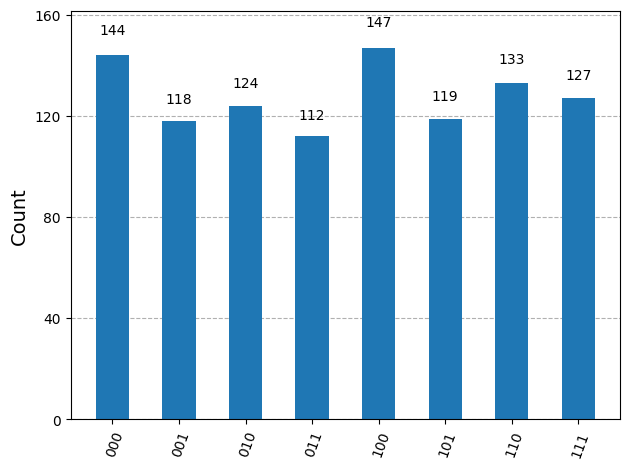

In [7]:
# Circuit for visualization
qc_viz = QuantumCircuit(3, 3)
qc_viz.h(range(3))
qc_viz.measure(range(3), range(3))

simulator = AerSimulator()
compiled_circuit = transpile(qc_viz, simulator)
result = simulator.run(compiled_circuit, shots=1024).result()
counts = result.get_counts(qc_viz)

plot_histogram(counts)
plt.show()